## 1. Benchmarking `kaiser_best` and `soxr_vhq` and `sinc_best`
- `kaiser_best`: from librosa library | https://librosa.org/doc/main/generated/librosa.resample.html 
- `soxr_vhq`: from SoX (Sound eXchange) library | https://sourceforge.net/p/sox/code/ci/master/tree/
- `sinc_best`: from samplerate library | http://www.mega-nerd.com/libsamplerate/quality.html

In [ ]:
# pip install samplerate soxr librosa numpy soundfile resampy

Original Sample Rate: 48000
Target Sample Rate: 44100
kaiser_best resampling time: 1.2286 seconds
sinc_best resampling time: 0.4896 seconds
soxr_vhq resampling time: 0.0140 seconds


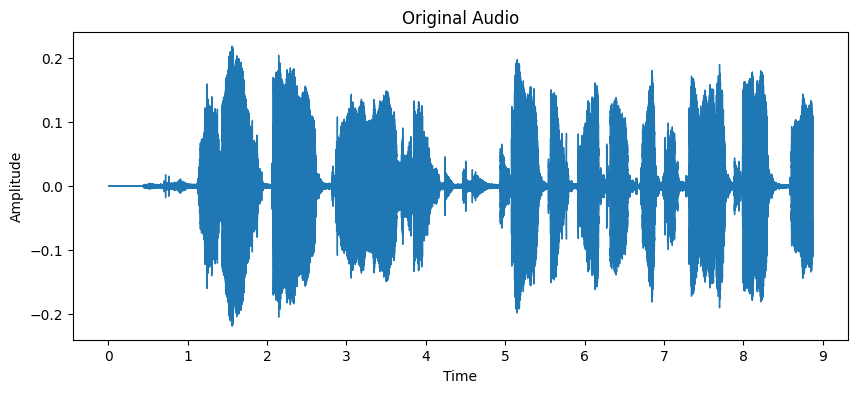

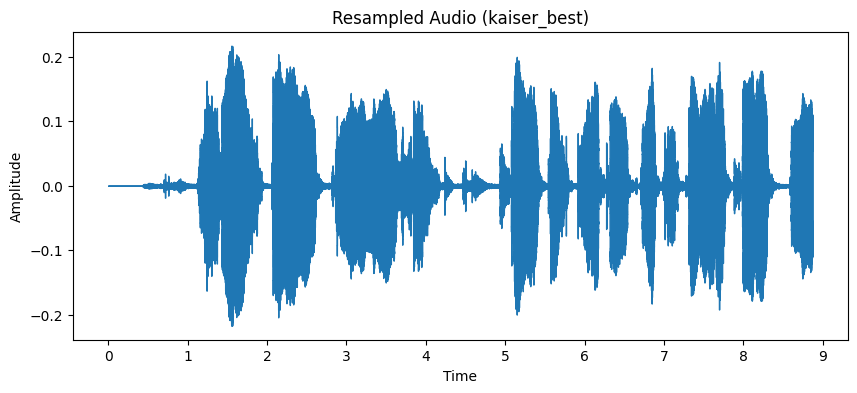

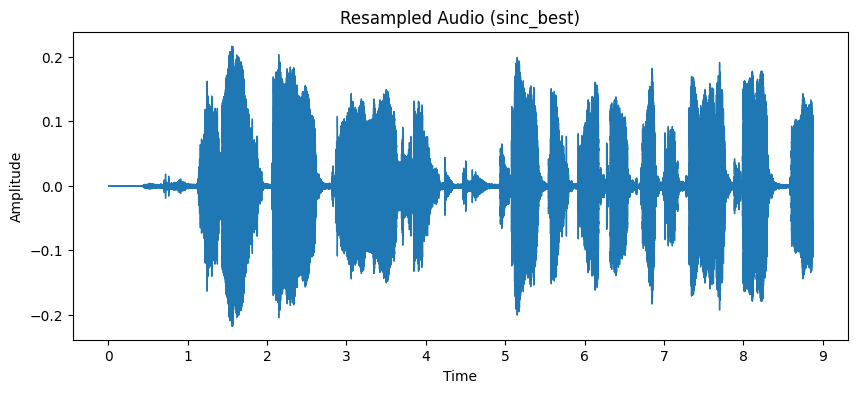

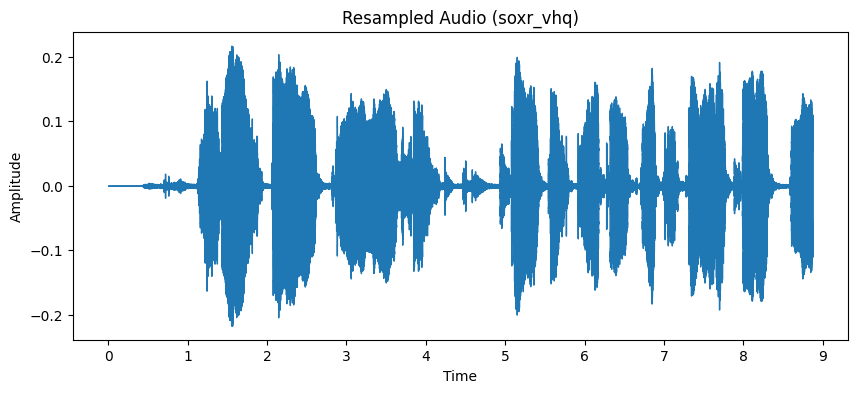

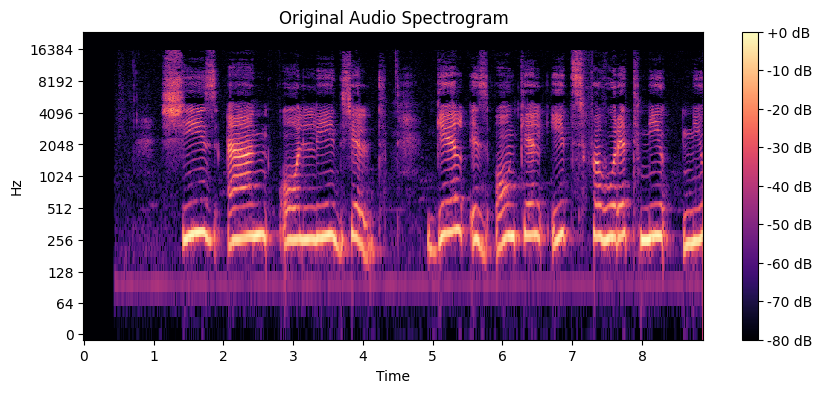

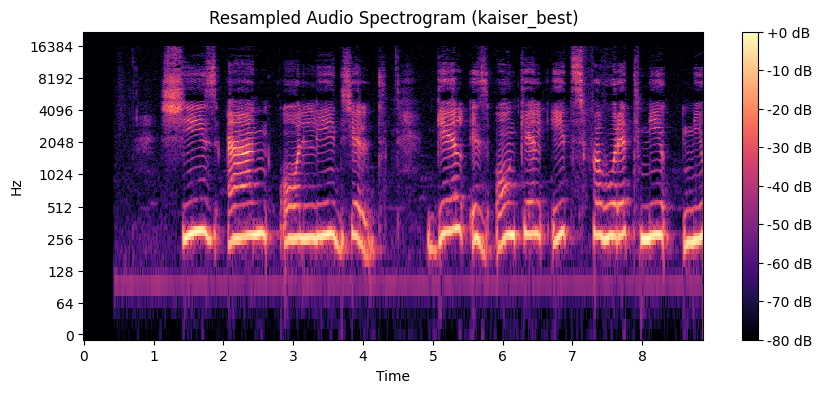

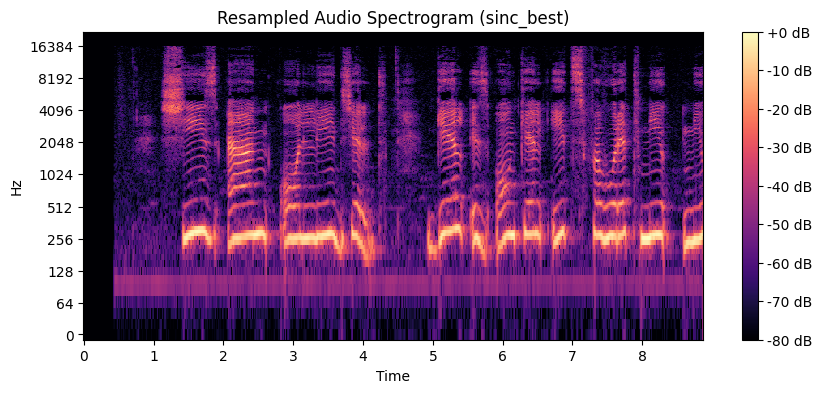

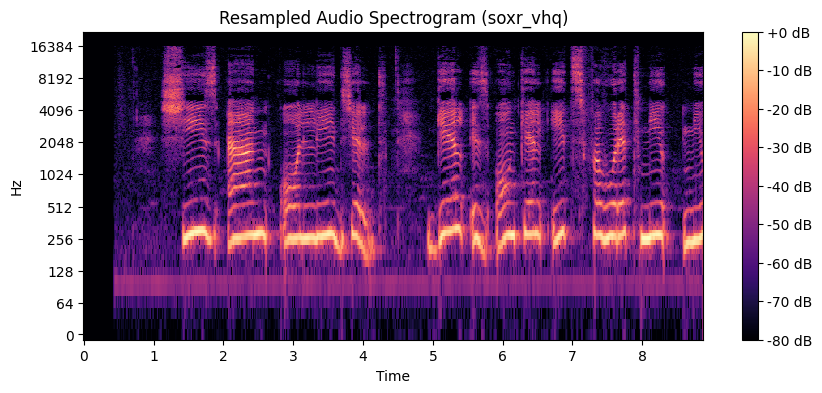

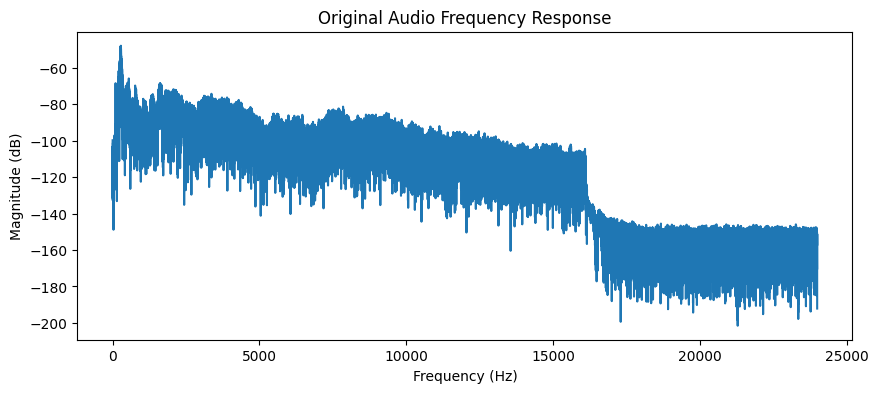

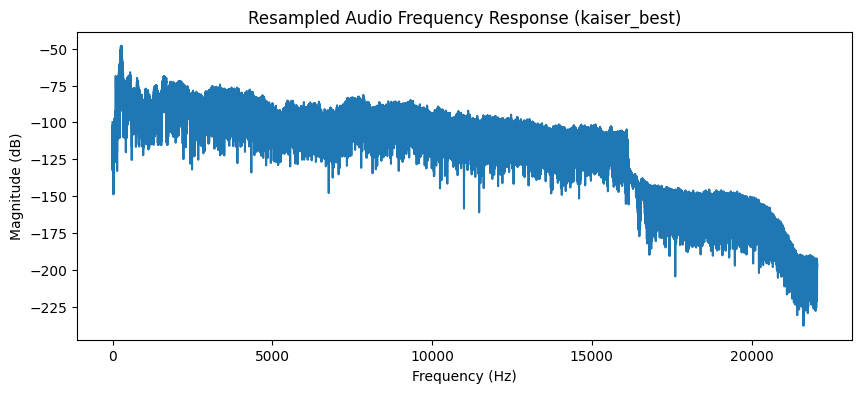

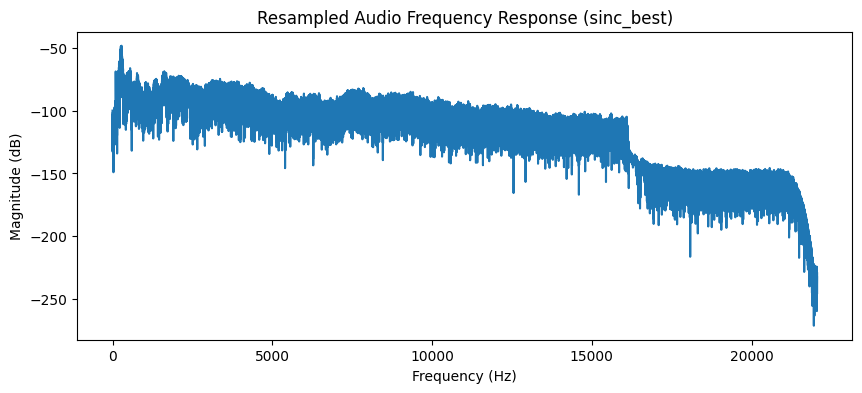

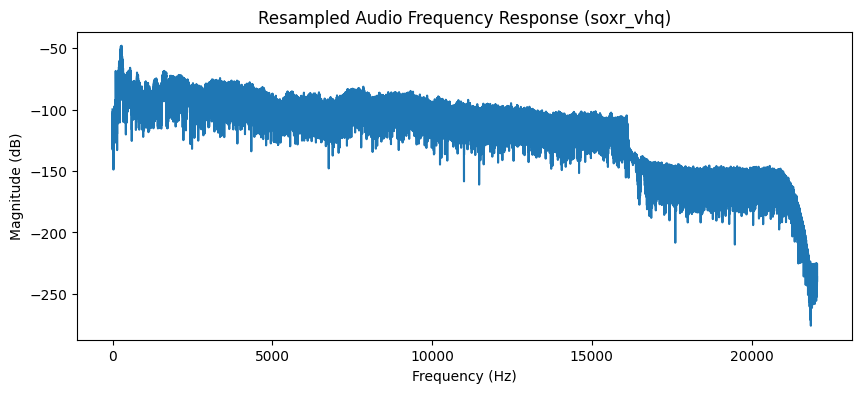

In [13]:
import time
import numpy as np
import matplotlib.pyplot as plt
import samplerate
import soxr
import librosa
import soundfile as sf

def resample_kaiser_best(y, ori_sr, target_sr):
    resampled = librosa.resample(y, orig_sr=ori_sr, target_sr=target_sr, res_type='kaiser_best')
    return resampled

def resample_sinc_best(y, ori_sr, target_sr, converter='sinc_best'):
    ratio = target_sr / ori_sr
    resampled = samplerate.resample(y, ratio, converter)
    return resampled

def resample_soxr_vhq(y, ori_sr, target_sr):
    resampled = soxr.resample(y, ori_sr, target_sr, quality='VHQ')
    return resampled

def plot_waveform(y, sample_rate, title):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sample_rate)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

def plot_spectrogram(y, sample_rate, title):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

def plot_frequency(y, sample_rate, title):
    plt.figure(figsize=(10, 4))
    plt.magnitude_spectrum(y, Fs=sample_rate, scale='dB')
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.show()

# Load the audio file using librosa
audio_output_path = "audio\output\\"
audio_path = "audio\speakers\Mendeley Data\differentPhrase\\1\\1-11.flac"
audio, ori_sample_rate = librosa.load(audio_path, sr=None)
target_sample_rate = 44100

print(f"Original Sample Rate: {ori_sample_rate}")
print(f"Target Sample Rate: {target_sample_rate}")

# Benchmark kaiser_best
start_time = time.time()
ra_kaiser_best = resample_kaiser_best(audio, ori_sample_rate, target_sample_rate)
kaiser_best_duration = time.time() - start_time
print(f"kaiser_best resampling time: {kaiser_best_duration:.4f} seconds")

# Benchmark sinc_best
start_time = time.time()
ra_sinc_best = resample_sinc_best(audio, ori_sample_rate, target_sample_rate)
sinc_best_duration = time.time() - start_time
print(f"sinc_best resampling time: {sinc_best_duration:.4f} seconds")

# Benchmark soxr_vhq
start_time = time.time()
ra_soxr_vhq = resample_soxr_vhq(audio, ori_sample_rate, target_sample_rate)
soxr_vhq_duration = time.time() - start_time
print(f"soxr_vhq resampling time: {soxr_vhq_duration:.4f} seconds")

# Save the resampled audio using soundfile
sf.write(audio_output_path + 'resampled_audio_kaiser_best.wav', ra_kaiser_best, target_sample_rate)
sf.write(audio_output_path + 'resampled_audio_sinc_best.wav', ra_sinc_best, target_sample_rate)
sf.write(audio_output_path + 'resampled_audio_soxr_vhq.wav', ra_soxr_vhq, target_sample_rate)

# Plot waveforms
plot_waveform(audio, ori_sample_rate, 'Original Audio')
plot_waveform(ra_kaiser_best, target_sample_rate, 'Resampled Audio (kaiser_best)')
plot_waveform(ra_sinc_best, target_sample_rate, 'Resampled Audio (sinc_best)')
plot_waveform(ra_soxr_vhq, target_sample_rate, 'Resampled Audio (soxr_vhq)')

# Plot spectrograms
plot_spectrogram(audio, ori_sample_rate, 'Original Audio Spectrogram')
plot_spectrogram(ra_kaiser_best, target_sample_rate, 'Resampled Audio Spectrogram (kaiser_best)')
plot_spectrogram(ra_sinc_best, target_sample_rate, 'Resampled Audio Spectrogram (sinc_best)')
plot_spectrogram(ra_soxr_vhq, target_sample_rate, 'Resampled Audio Spectrogram (soxr_vhq)')

# Plot frequency responses
plot_frequency(audio, ori_sample_rate, 'Original Audio Frequency Response')
plot_frequency(ra_kaiser_best, target_sample_rate, 'Resampled Audio Frequency Response (kaiser_best)')
plot_frequency(ra_sinc_best, target_sample_rate, 'Resampled Audio Frequency Response (sinc_best)')
plot_frequency(ra_soxr_vhq, target_sample_rate, 'Resampled Audio Frequency Response (soxr_vhq)')


## Conclusion: 
We are using `soxr_vhq` for the best performance, with little to no difference compared to the `sinc_best` method. `kaiser_best` although with its better frequency response but require almost 87 times higher duration than `soxr_vhq` to process. 